In [1]:
"""In the FIFA 21 Project we will try to predict a player's "Overall Rating" by analysing data from the following dataset: fifa21_train.csv
It can be found in the GDrive.

The database is an extract from https://sofifa.com/

Explanations of the acronyms and abbreviations can be found here and here"""

'In the FIFA 21 Project we will try to predict a player\'s "Overall Rating" by analysing data from the following dataset: fifa21_train.csv\nIt can be found in the GDrive.\n\nThe database is an extract from https://sofifa.com/\n\nExplanations of the acronyms and abbreviations can be found here and here'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('fifa21_train.csv')
df

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


In [4]:
column_names = df.columns.tolist()
column_names

['ID',
 'Name',
 'Age',
 'Nationality',
 'Club',
 'BP',
 'Position',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Hits',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM'

In [5]:
fifa_df = df.copy()
fifa_df

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,B. Böðvarsson,25,Iceland,Jagiellonia Białystok,LB,LB,Jagiellonia Białystok 2018 ~ 2021,"6'1""",168lbs,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,214680,G. Gallon,27,France,ESTAC Troyes,GK,GK,ESTAC Troyes 2019 ~ 2022,"6'1""",174lbs,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,221489,J. Flores,22,Chile,CD Antofagasta,RM,LM CAM RM,CD Antofagasta 2019 ~ 2024,"5'6""",143lbs,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67
11699,146717,Anderson Silva,26,Brazil,Barnsley,CM,NaN,Barnsley 2010,"6'2""",179lbs,...,68+0,68+0,66+0,64+0,60+0,60+0,60+0,64+0,25+0,68


In [6]:
#columns_to_retain = [
    #'BP', 'Position',
    #'Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Composure',
     #'Defending','Goalkeeping', 'OVA','LS', 'ST', 'RS', 'LW', 'LF', 'CF',
     #'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB',
     #'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK',]

columns_to_retain = [
    'BP', 'Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Composure',
     'Defending','Goalkeeping','OVA']

        
# Now you can use this list to filter your dataframe:
fifa_df_filtered = fifa_df[columns_to_retain]
fifa_df_filtered

,BP,Attacking,Skill,Movement,Power,Mentality,Composure,Defending,Goalkeeping,OVA
0,CM,258,286,346,306,290,54.0,148,48,64
1,ST,365,375,404,372,313,70.0,77,55,77
2,CAM,336,424,424,308,332,82.0,80,21,80
3,CDM,242,259,282,277,257,48.0,168,42,59
4,CDM,249,280,324,280,294,58.0,185,52,65
...,...,...,...,...,...,...,...,...,...,...
11696,LB,224,248,333,273,266,46.0,184,61,65
11697,GK,84,96,237,217,101,56.0,41,347,70
11698,RM,286,291,388,278,241,58.0,62,57,67
11699,CM,254,284,198,258,241,NaN,113,81,68


In [7]:
check_duplicates = fifa_df_filtered.duplicated()
check_duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
11696    False
11697    False
11698    False
11699    False
11700    False
Length: 11701, dtype: bool

In [8]:
num_duplicates = check_duplicates.sum()
num_duplicates

0

In [9]:
column_rename = {'BP': 'Best Position', 'OVA':'overall value'}
fifa_df_filtered = fifa_df_filtered.rename(columns=column_rename)
fifa_df_filtered

,Best Position,Attacking,Skill,Movement,Power,Mentality,Composure,Defending,Goalkeeping,overall value
0,CM,258,286,346,306,290,54.0,148,48,64
1,ST,365,375,404,372,313,70.0,77,55,77
2,CAM,336,424,424,308,332,82.0,80,21,80
3,CDM,242,259,282,277,257,48.0,168,42,59
4,CDM,249,280,324,280,294,58.0,185,52,65
...,...,...,...,...,...,...,...,...,...,...
11696,LB,224,248,333,273,266,46.0,184,61,65
11697,GK,84,96,237,217,101,56.0,41,347,70
11698,RM,286,291,388,278,241,58.0,62,57,67
11699,CM,254,284,198,258,241,NaN,113,81,68


In [10]:
cols = []
for i in range(len(fifa_df_filtered.columns)):
    cols.append(fifa_df_filtered.columns[i].lower().replace(' ', '_'))
fifa_df_filtered.columns = cols
fifa_df_filtered

,best_position,attacking,skill,movement,power,mentality,composure,defending,goalkeeping,overall_value
0,CM,258,286,346,306,290,54.0,148,48,64
1,ST,365,375,404,372,313,70.0,77,55,77
2,CAM,336,424,424,308,332,82.0,80,21,80
3,CDM,242,259,282,277,257,48.0,168,42,59
4,CDM,249,280,324,280,294,58.0,185,52,65
...,...,...,...,...,...,...,...,...,...,...
11696,LB,224,248,333,273,266,46.0,184,61,65
11697,GK,84,96,237,217,101,56.0,41,347,70
11698,RM,286,291,388,278,241,58.0,62,57,67
11699,CM,254,284,198,258,241,NaN,113,81,68


In [11]:
#def convert_position_rating(value):
    # If it is a full number, it remains as it is
    #if isinstance(value, int):
        #return value
    
    # If the value contains '+', we split it and add it
    #if '+' in value:
       # base, added = value.split('+')
        #return int(base) + int(added)
    # If there is no '+', we just convert the value to a full number
    #else:
        #return int(value)

# Columns to apply it
#columns_to_process = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
       #'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm',
       #'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb','gk']

# Applying the function to each column
#for col in columns_to_process:
    #fifa_df_filtered[col] = fifa_df_filtered[col].apply(convert_position_rating)
    

In [12]:
fifa_df_filtered

,best_position,attacking,skill,movement,power,mentality,composure,defending,goalkeeping,overall_value
0,CM,258,286,346,306,290,54.0,148,48,64
1,ST,365,375,404,372,313,70.0,77,55,77
2,CAM,336,424,424,308,332,82.0,80,21,80
3,CDM,242,259,282,277,257,48.0,168,42,59
4,CDM,249,280,324,280,294,58.0,185,52,65
...,...,...,...,...,...,...,...,...,...,...
11696,LB,224,248,333,273,266,46.0,184,61,65
11697,GK,84,96,237,217,101,56.0,41,347,70
11698,RM,286,291,388,278,241,58.0,62,57,67
11699,CM,254,284,198,258,241,NaN,113,81,68


In [13]:
#Check null values
fifa_df_filtered.isna().sum()

best_position      0
attacking          0
skill              0
movement           0
power              0
mentality          0
composure        279
defending          0
goalkeeping        0
overall_value      0
dtype: int64

In [14]:
# Separating numerical data and categorical data
cat_df = fifa_df_filtered.select_dtypes(include= 'object')
num_df = fifa_df_filtered.select_dtypes(include= np.number)


In [15]:
#Applying median for numerical and mode for categorical values to replace null values
for col in fifa_df_filtered.columns:
        if fifa_df_filtered[col].dtype == 'object':
            fifa_df_filtered[col].fillna(fifa_df_filtered[col].mode()[0], inplace=True)
        else:
            fifa_df_filtered[col].fillna(fifa_df_filtered[col].median(), inplace=True)

In [16]:
# Checking the replacement of the null values
null_counts = fifa_df_filtered.isnull().sum()
null_counts.sum()


0

In [17]:
# Checking the statistics
fifa_df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
attacking,11701.0,258.482181,72.267012,33.0,232.0,271.0,306.0,437.0
skill,11701.0,266.497222,76.835287,43.0,232.0,279.0,319.0,470.0
movement,11701.0,322.617383,55.330054,113.0,294.0,331.0,361.0,464.0
power,11701.0,302.083326,49.697749,133.0,271.0,308.0,339.0,444.0
mentality,11701.0,261.704982,62.935298,55.0,235.0,269.0,304.0,414.0
composure,11701.0,59.972823,11.629800,12.0,53.0,61.0,68.0,96.0
defending,11701.0,140.674558,61.599006,17.0,83.0,156.0,194.0,267.0
goalkeeping,11701.0,77.726946,81.221525,12.0,48.0,53.0,59.0,439.0
overall_value,11701.0,66.921972,6.876081,38.0,62.0,67.0,72.0,93.0


In [18]:
# Plotting the numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

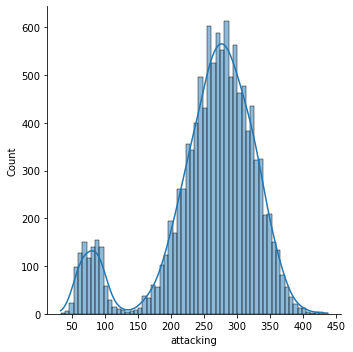

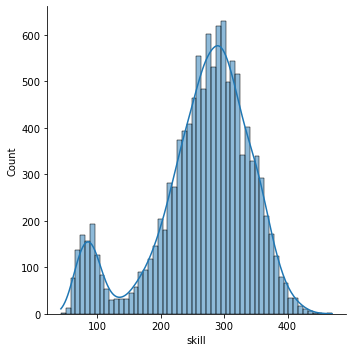

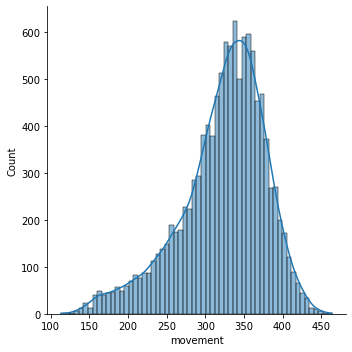

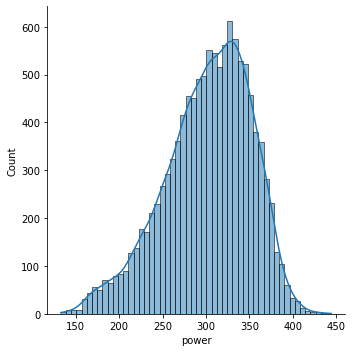

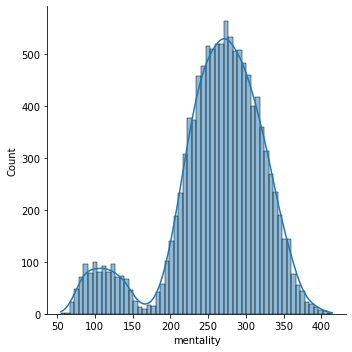

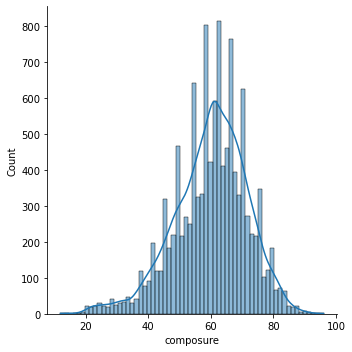

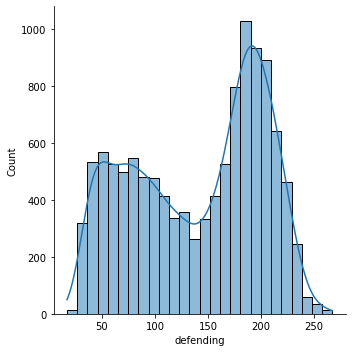

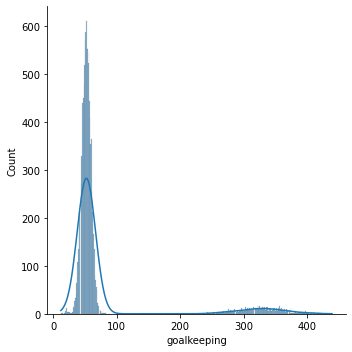

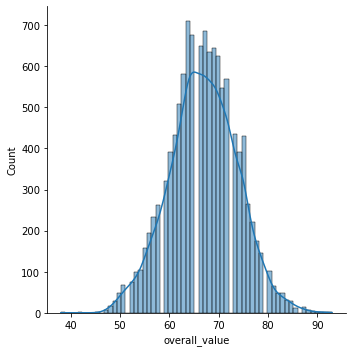

In [19]:
for column in num_df:
    sns.displot(num_df[column],kde=True)
    plt.show()

In [20]:
# Overall value shows a normalized shapped bell

In [21]:
# Getting correlations descritpion
correlations = num_df.corr()
correlations

,attacking,skill,movement,power,mentality,composure,defending,goalkeeping,overall_value
attacking,1.000000,0.928584,0.692493,0.823527,0.888604,0.708078,0.311367,-0.769826,0.433092
skill,0.928584,1.000000,0.725776,0.753061,0.885893,0.711251,0.370432,-0.716263,0.442666
movement,0.692493,0.725776,1.000000,0.560489,0.610661,0.474834,0.174070,-0.563037,0.304496
power,0.823527,0.753061,0.560489,1.000000,0.823428,0.698385,0.361816,-0.573683,0.547839
mentality,0.888604,0.885893,0.610661,0.823428,1.000000,0.742786,0.587906,-0.727656,0.494590
composure,0.708078,0.711251,0.474834,0.698385,0.742786,1.000000,0.351202,-0.396401,0.693342
defending,0.311367,0.370432,0.174070,0.361816,0.587906,0.351202,1.000000,-0.496275,0.243725
goalkeeping,-0.769826,-0.716263,-0.563037,-0.573683,-0.727656,-0.396401,-0.496275,1.000000,0.038584
overall_value,0.433092,0.442666,0.304496,0.547839,0.494590,0.693342,0.243725,0.038584,1.000000


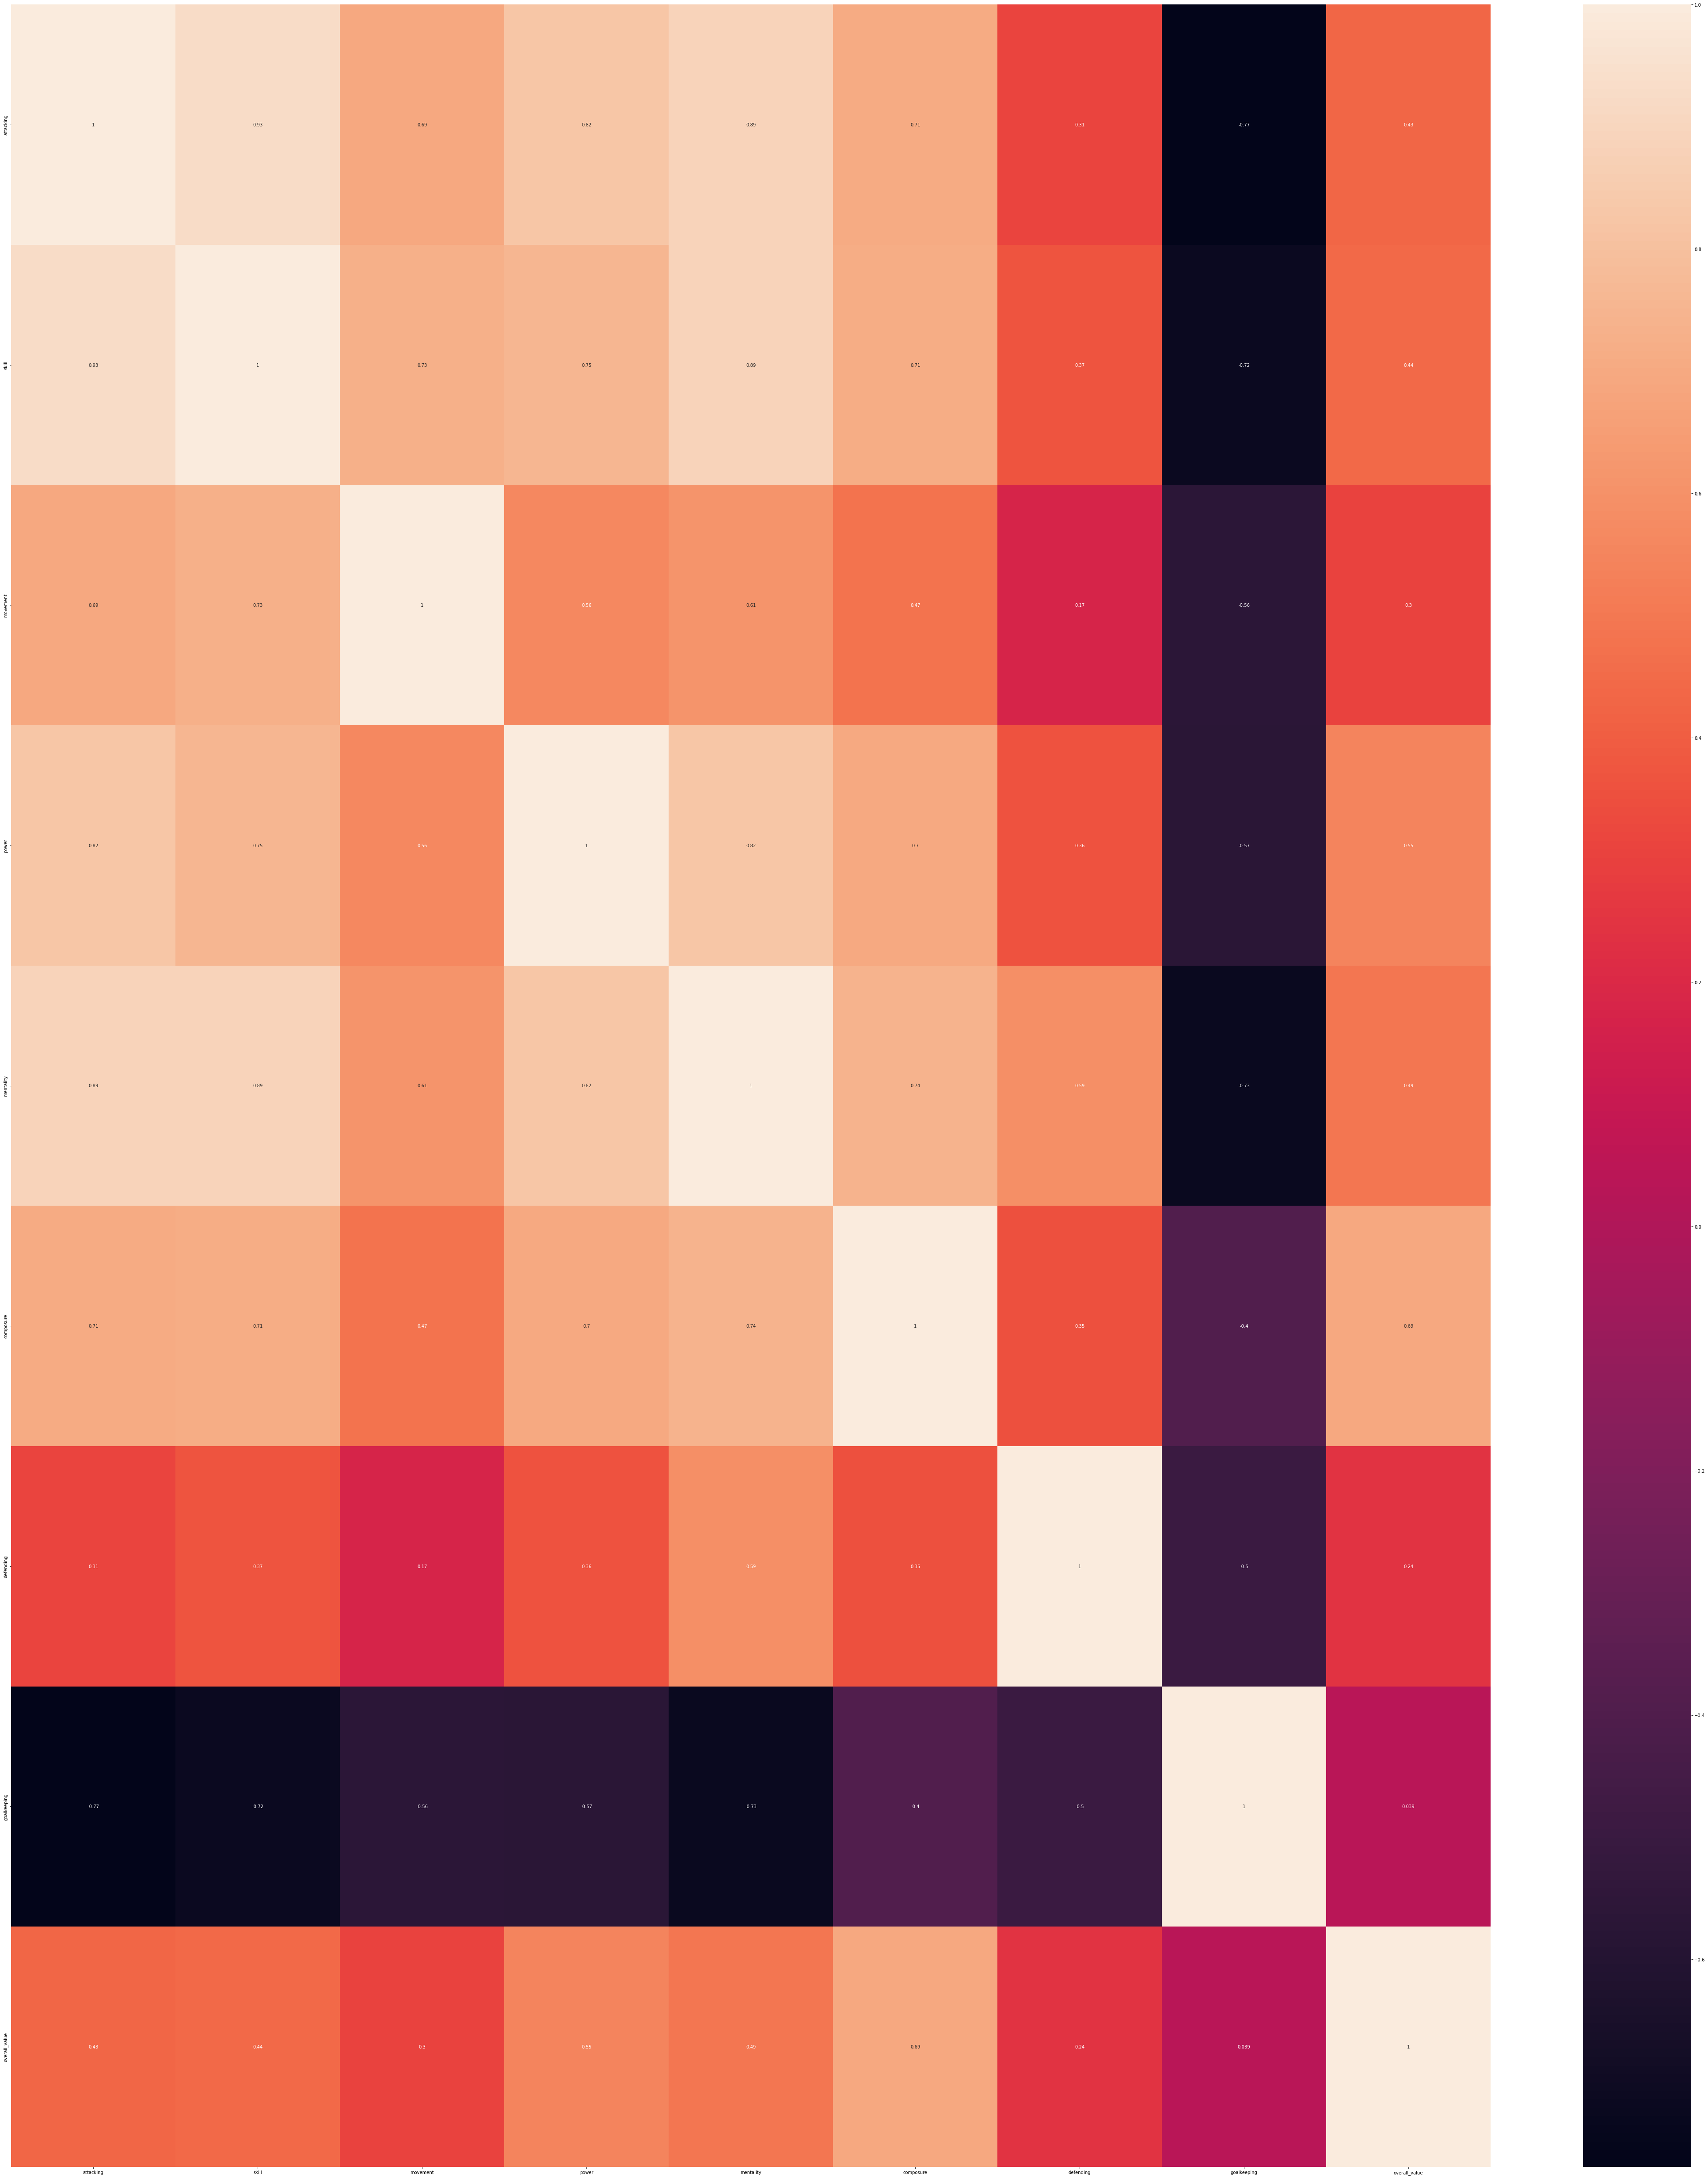

In [22]:
fig, ax=plt.subplots(figsize=(75,90))
ax=sns.heatmap(num_df.corr(), annot=True)
plt.show()

In [23]:
# There seems to be some Mulicolliniarity

In [24]:
fifa_new = fifa_df_filtered
fifa_new

,best_position,attacking,skill,movement,power,mentality,composure,defending,goalkeeping,overall_value
0,CM,258,286,346,306,290,54.0,148,48,64
1,ST,365,375,404,372,313,70.0,77,55,77
2,CAM,336,424,424,308,332,82.0,80,21,80
3,CDM,242,259,282,277,257,48.0,168,42,59
4,CDM,249,280,324,280,294,58.0,185,52,65
...,...,...,...,...,...,...,...,...,...,...
11696,LB,224,248,333,273,266,46.0,184,61,65
11697,GK,84,96,237,217,101,56.0,41,347,70
11698,RM,286,291,388,278,241,58.0,62,57,67
11699,CM,254,284,198,258,241,61.0,113,81,68


In [25]:
# X,y split and target definition

X=fifa_new.drop('overall_value', axis=1)     
y=fifa_new['overall_value']


In [26]:
# Categorical and numerical split of X
X_cat = X.select_dtypes(include= 'object')
X_num = X.select_dtypes(include= np.number)

In [27]:
X_num

,attacking,skill,movement,power,mentality,composure,defending,goalkeeping
0,258,286,346,306,290,54.0,148,48
1,365,375,404,372,313,70.0,77,55
2,336,424,424,308,332,82.0,80,21
3,242,259,282,277,257,48.0,168,42
4,249,280,324,280,294,58.0,185,52
...,...,...,...,...,...,...,...,...
11696,224,248,333,273,266,46.0,184,61
11697,84,96,237,217,101,56.0,41,347
11698,286,291,388,278,241,58.0,62,57
11699,254,284,198,258,241,61.0,113,81


In [28]:
#Getting the stats
X_num.describe().T

,count,mean,std,min,25%,50%,75%,max
attacking,11701.0,258.482181,72.267012,33.0,232.0,271.0,306.0,437.0
skill,11701.0,266.497222,76.835287,43.0,232.0,279.0,319.0,470.0
movement,11701.0,322.617383,55.330054,113.0,294.0,331.0,361.0,464.0
power,11701.0,302.083326,49.697749,133.0,271.0,308.0,339.0,444.0
mentality,11701.0,261.704982,62.935298,55.0,235.0,269.0,304.0,414.0
composure,11701.0,59.972823,11.629800,12.0,53.0,61.0,68.0,96.0
defending,11701.0,140.674558,61.599006,17.0,83.0,156.0,194.0,267.0
goalkeeping,11701.0,77.726946,81.221525,12.0,48.0,53.0,59.0,439.0


In [29]:
# importing the library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [30]:
#Scalling using MinMax
transformer = StandardScaler().fit(X_num)
X_standard = transformer.transform(X_num)
print(X_standard.shape)
X_num_standard = pd.DataFrame(X_standard, columns=X_num.columns)
X_num_standard.head()

(11701, 8)


,attacking,skill,movement,power,mentality,composure,defending,goalkeeping
0,-0.006672,0.253837,0.422621,0.078813,0.449608,-0.513601,0.118927,-0.366014
1,1.474011,1.412208,1.470920,1.406898,0.815079,0.862234,-1.033739,-0.279826
2,1.072704,2.049963,1.832403,0.119058,1.116989,1.894110,-0.985035,-0.698452
3,-0.228083,-0.097579,-0.734124,-0.504739,-0.074762,-1.029539,0.443621,-0.439889
4,-0.131216,0.175744,0.024990,-0.444372,0.513168,-0.169642,0.719611,-0.316764


In [31]:
# One hot encoded
from sklearn.preprocessing import OneHotEncoder

In [32]:
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

,best_position_CB,best_position_CDM,best_position_CF,best_position_CM,best_position_GK,best_position_LB,best_position_LM,best_position_LW,best_position_LWB,best_position_RB,best_position_RM,best_position_RW,best_position_RWB,best_position_ST
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# concat numerical and categorical transformations for features
X=pd.concat([X_num_standard, X_cat_encode], axis=1) 
X.describe()

,attacking,skill,movement,power,mentality,composure,defending,goalkeeping,best_position_CB,best_position_CDM,...,best_position_GK,best_position_LB,best_position_LM,best_position_LW,best_position_LWB,best_position_RB,best_position_RM,best_position_RW,best_position_RWB,best_position_ST
count,1.170100e+04,1.170100e+04,1.170100e+04,1.170100e+04,1.170100e+04,1.170100e+04,1.170100e+04,1.170100e+04,11701.000000,11701.000000,...,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
mean,2.726788e-16,-2.200120e-16,-5.360496e-16,5.248914e-16,4.531600e-17,-3.704222e-17,-1.215258e-16,7.483877e-17,0.185454,0.071361,...,0.092385,0.054098,0.047774,0.012648,0.014700,0.053842,0.082984,0.019486,0.014187,0.158790
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,0.388682,0.257439,...,0.289581,0.226221,0.213296,0.111757,0.120353,0.225714,0.275870,0.138230,0.118266,0.365496
min,-3.120259e+00,-2.908908e+00,-3.788652e+00,-3.402378e+00,-3.284545e+00,-4.125167e+00,-2.007822e+00,-8.092652e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.664648e-01,-4.489955e-01,-5.172344e-01,-6.254741e-01,-4.243425e-01,-5.995908e-01,-9.363304e-01,-3.660140e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.732236e-01,1.627288e-01,1.515085e-01,1.190582e-01,1.159179e-01,8.832663e-02,2.488043e-01,-3.044514e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.575594e-01,6.833452e-01,6.937325e-01,7.428556e-01,6.720684e-01,6.902544e-01,8.657237e-01,-2.305762e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.470359e+00,2.648672e+00,2.555368e+00,2.855718e+00,2.419970e+00,3.097965e+00,2.050858e+00,4.448187e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# Train Test Split
from sklearn.model_selection import train_test_split as tts

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9360, 22)
(2341, 22)
(9360,)
(2341,)


In [36]:
X_train.head()

,attacking,skill,movement,power,mentality,composure,defending,goalkeeping,best_position_CB,best_position_CDM,...,best_position_GK,best_position_LB,best_position_LM,best_position_LW,best_position_LWB,best_position_RB,best_position_RM,best_position_RW,best_position_RWB,best_position_ST
1775,0.270091,-0.188687,-0.191900,-0.142534,-0.710363,-0.599591,-1.423372,-0.329076,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2455,1.515526,1.256023,-2.071610,0.662366,0.799189,1.292182,-1.147382,-0.341389,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
93,-0.103540,-0.136626,-0.697976,0.119058,0.243038,0.432285,0.979367,-0.218264,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8952,-0.241921,-0.006472,-0.083455,-0.967557,-0.805703,0.432285,-0.205768,-0.476827,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7810,1.543202,1.464270,1.615513,2.010573,1.625469,1.378172,-0.286942,-0.378327,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
# Train and run model
from sklearn.linear_model import LinearRegression as linreg

lm = linreg()    # model
lm.fit(X_train, y_train)   # model training
y_pred = lm.predict(X_test)   # model prediction

In [38]:
# Model Validation

In [39]:
print ('train R2: {} -- test R2: {}'.format(lm.score(X_train, y_train),
                                            lm.score(X_test, y_test)))

train R2: 0.7930246838720423 -- test R2: 0.7975558357882591


In [40]:
# MSE
from sklearn.metrics import mean_squared_error as mse

train_mse=mse(lm.predict(X_train), y_train)
test_mse=mse(y_pred, y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 9.773487937303264 -- test MSE: 9.58584268578029


In [41]:
# RMSE
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 3.126257816832013 -- test RMSE: 3.0961012072896277


In [42]:
#MAE
from sklearn.metrics import mean_absolute_error as mae

train_mae=mae(lm.predict(X_train), y_train)
test_mae=mae(y_pred, y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mae, test_mae))

train MAE: 2.423338386034466 -- test MAE: 2.4109100652953503


# BONUS

Try to create a new function called preprocess which"

takes a dataframe as input
call all the other group member functions and apply them to the starting dataframe
return a clean dataframe.

In [43]:
    # Your code here
    def clean_fifa(fifa_new):
        n_cols = ['BP', 'Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Composure',
     'Defending','Goalkeeping', 'OVA']
        for i in range(len(fifa_new.columns)):
            n_cols.append(fifa_new.columns[i].lower().replace(' ', '_'))
        fifa_new.columns = n_cols
        fifa_new = df.rename(columns={'BP': 'Best Position', 'OVA':'overall value'})
        fifa_new = df.drop_duplicates()
        cat_df = df.select_dtypes(include= 'object')
        num_df = df.select_dtypes(include= np.number)
        for col in df.columns:
            if fifa_new[col].dtype == 'object':
                fifa_new[col].fillna(fifa_new[col].mode()[0], inplace=True)
            else:
                fifa_new[col].fillna(fifa_new[col].median(), inplace=True)
    fifa_new          

,best_position,attacking,skill,movement,power,mentality,composure,defending,goalkeeping,overall_value
0,CM,258,286,346,306,290,54.0,148,48,64
1,ST,365,375,404,372,313,70.0,77,55,77
2,CAM,336,424,424,308,332,82.0,80,21,80
3,CDM,242,259,282,277,257,48.0,168,42,59
4,CDM,249,280,324,280,294,58.0,185,52,65
...,...,...,...,...,...,...,...,...,...,...
11696,LB,224,248,333,273,266,46.0,184,61,65
11697,GK,84,96,237,217,101,56.0,41,347,70
11698,RM,286,291,388,278,241,58.0,62,57,67
11699,CM,254,284,198,258,241,61.0,113,81,68
